In [49]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
import zipfile
from PIL import Image



Download the data labels

In [27]:
METADATA_URL = 'https://dataverse.harvard.edu/api/access/datafile/4338392?format=original&gbrecs=true'
GROUND_TRUTH_URL = 'https://dataverse.harvard.edu/api/access/datafile/6924466?format=original&gbrecs=true'


def download_csv(url: str) -> pd.DataFrame:
    '''Download a csv to a dataframe'''
    r = requests.get(url)
    r.raise_for_status()
    buffer = io.BytesIO(r.content)
    df = pd.read_csv(buffer)
    return df


train_labels = download_csv(METADATA_URL)
test_labels = download_csv(GROUND_TRUTH_URL)

In [28]:
train_labels.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [29]:
test_labels.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAMTEST_0000000,ISIC_0034524,nv,follow_up,40.0,female,back,vidir_molemax
1,HAMTEST_0000001,ISIC_0034525,nv,histo,70.0,male,abdomen,rosendahl
2,HAMTEST_0000002,ISIC_0034526,bkl,histo,70.0,male,back,rosendahl
3,HAMTEST_0000003,ISIC_0034527,nv,histo,35.0,male,trunk,vienna_dias
4,HAMTEST_0000004,ISIC_0034528,nv,follow_up,75.0,female,trunk,vidir_molemax


Visualize labels

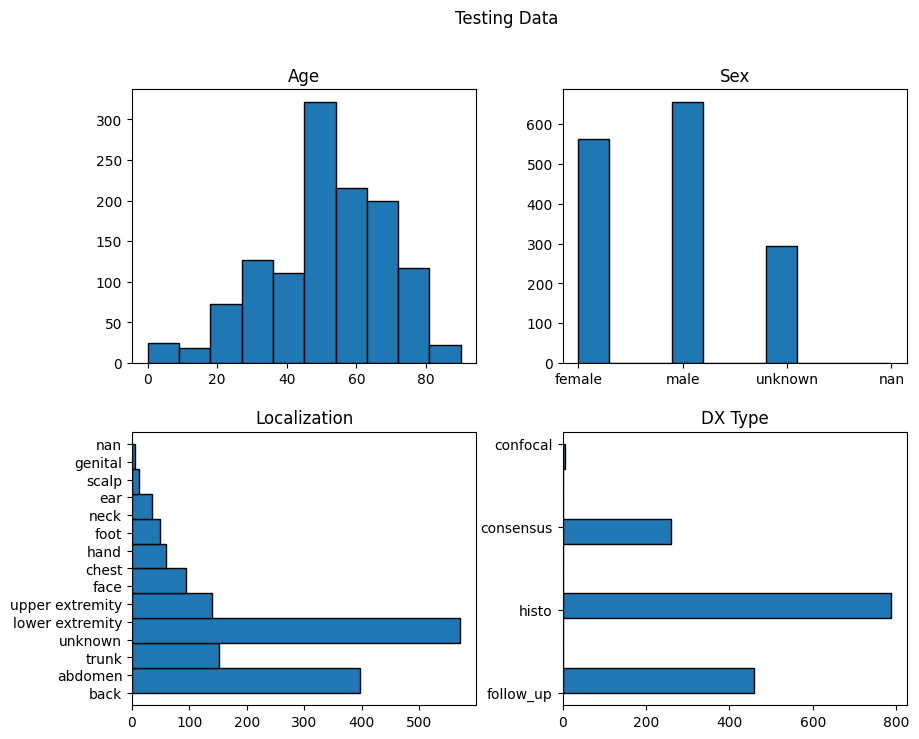

In [60]:
fig = plt.figure(figsize = (10, 8))
gs = fig.add_gridspec(2, 2, hspace = 0.25, wspace = 0.25)
axs = gs.subplots()
fig.suptitle('Testing Data')

axs[0, 0].hist(test_labels['age'], edgecolor = '0')
axs[0, 0].set_title('Age')
axs[0, 1].hist(test_labels['sex'].astype(str), edgecolor = '0')
axs[0, 1].set_title('Sex')

axs[1, 0].hist(test_labels['localization'].astype(str), orientation = 'horizontal', edgecolor = '0')
axs[1, 0].set_title('Localization')
axs[1, 1].hist(test_labels['dx_type'], orientation = 'horizontal', edgecolor = '0')
axs[1, 1].set_title('DX Type')

plt.show()

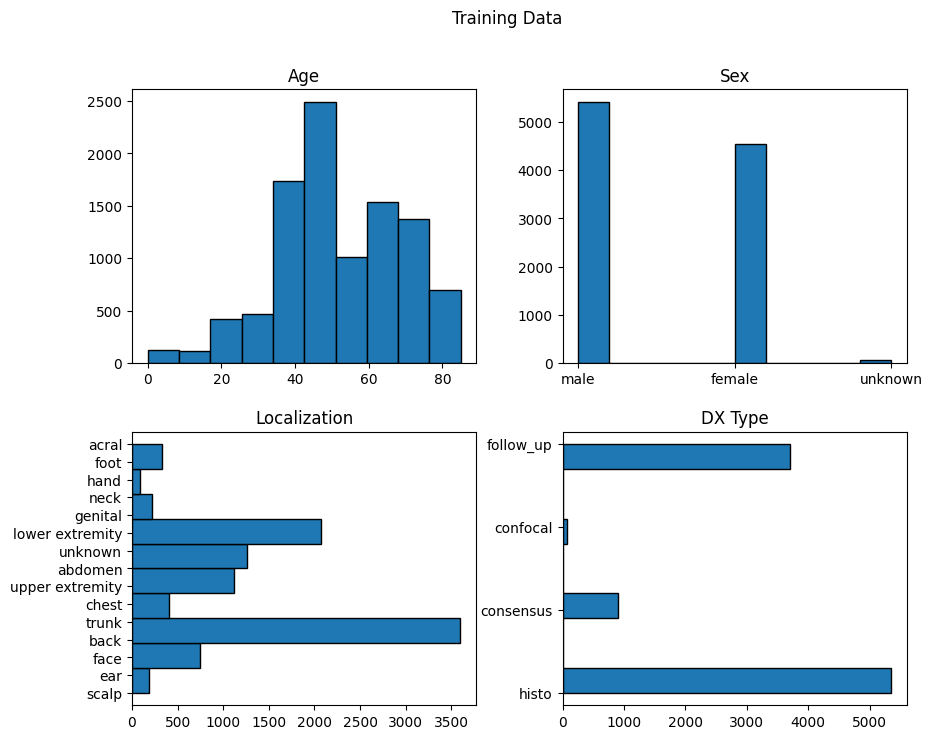

In [62]:
fig = plt.figure(figsize = (10, 8))
gs = fig.add_gridspec(2, 2, hspace = 0.25, wspace = 0.25)
axs = gs.subplots()
fig.suptitle('Training Data')

axs[0, 0].hist(train_labels['age'], edgecolor = '0')
axs[0, 0].set_title('Age')
axs[0, 1].hist(train_labels['sex'], edgecolor = '0')
axs[0, 1].set_title('Sex')

axs[1, 0].hist(train_labels['localization'], orientation = 'horizontal', edgecolor = '0')
axs[1, 0].set_title('Localization')
axs[1, 1].hist(train_labels['dx_type'], orientation = 'horizontal', edgecolor = '0')
axs[1, 1].set_title('DX Type')

plt.show()

In [2]:
# These are very large files, take care when downloading them
DATA_URL_1 = 'https://dataverse.harvard.edu/api/access/datafile/3172585?gbrecs=true'
DATA_URL_2 = 'https://dataverse.harvard.edu/api/access/datafile/3172584?gbrecs=true'

TEST_DATA_URL = 'https://dataverse.harvard.edu/api/access/datafile/3855824?format=original&gbrecs=true'

In [69]:
def download_data(url: str) -> np.ndarray:
    '''Download a zipfile'''
    r = requests.get(url)
    r.raise_for_status()
    buffer = io.BytesIO(r.content)
    return zipfile.ZipFile(buffer)
        

In [70]:
def gen_img_arrays(url: str):
    '''Yield image arrays from a zip folder containing jpgs'''
    with download_data(url) as zip_:
        for n in zip_.namelist():
            if '__' in n or '.jpg' not in n: continue
            with zip_.open(n) as f:
                yield np.array(Image.open(f))
        
        

In [71]:
images = gen_img_arrays(TEST_DATA_URL)
    

<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
/var/folders/4d/kgsz49v92zs95xsdl26xqnd40000gn/T/ipykernel_38832/393127585.py:2: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if i is 3: break


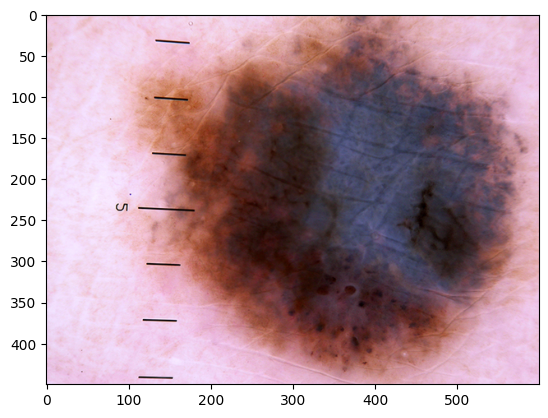

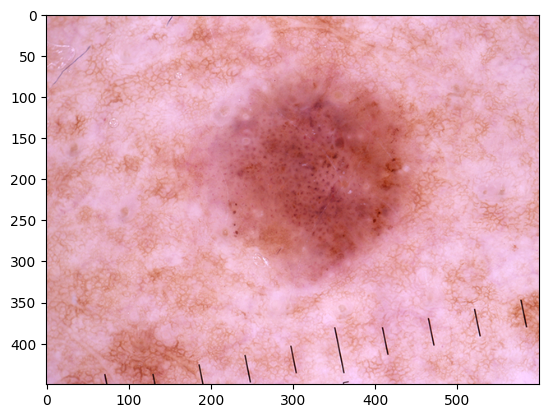

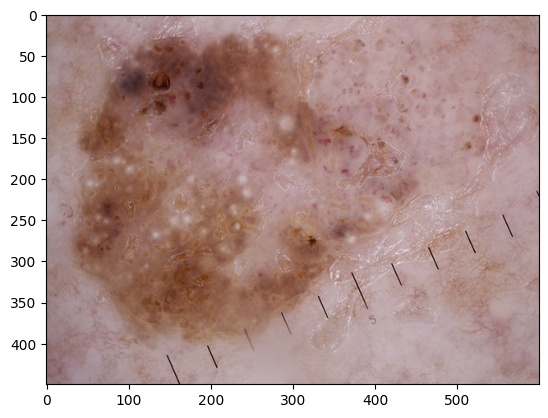

In [72]:
for i, image in enumerate(images):
    if i is 3: break
    plt.imshow(image)
    plt.show()